In [5]:
import os
from pathlib import Path
import pandas as pd

ROOT = Path(os.getcwd()).parent
ROOT

PosixPath('/Users/dantrainer/projects/cancer_research')

In [11]:
df = pd.read_json(os.path.join(ROOT, "data", "clinical.cohort.2025-06-17.json"))
print(df.shape)
df.head()

(45087, 18)


,primary_site,disease_type,updated_datetime,case_id,project,submitter_id,state,diagnoses,created_datetime,demographic,lost_to_followup,family_histories,days_to_consent,consent_type,follow_ups,index_date,exposures,days_to_lost_to_followup
0,Breast,"Epithelial Neoplasms, NOS",2018-10-25T12:28:33.672509-05:00,00016c8f-a0be-4319-9c42-4f3bcd90ac92,{'project_id': 'FM-AD'},AD1602,released,"[{'morphology': '8010/3', 'submitter_id': 'AD1...",2017-06-01T09:07:33.461299-05:00,{'demographic_id': '4d0c7e80-79f9-43b2-aecc-96...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bronchus and lung,Adenomas and Adenocarcinomas,2018-10-25T12:34:13.959843-05:00,00048fa6-4318-42ef-9709-7dedb0d938b3,{'project_id': 'FM-AD'},AD2413,released,"[{'morphology': '8140/3', 'submitter_id': 'AD2...",2017-06-01T09:26:11.608371-05:00,{'demographic_id': 'ecd2d164-c2ed-4e15-80d8-6a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Liver and intrahepatic bile ducts,Adenomas and Adenocarcinomas,2025-01-06T13:18:44.419559-06:00,0004d251-3f70-4395-b175-c94c2f5b1b81,{'project_id': 'TCGA-LIHC'},TCGA-DD-AAVP,released,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",NaN,{'demographic_id': 'aac73088-e280-54f6-bc81-f6...,No,"[{'relative_with_cancer_history': 'yes', 'upda...",1305.0,Informed Consent,"[{'days_to_recurrence': 903, 'timepoint_catego...",Diagnosis,NaN,NaN
3,Pancreas,Ductal and Lobular Neoplasms,2018-10-25T11:34:27.425461-05:00,00061f34-c891-4f9c-b8d6-3ca68b98c875,{'project_id': 'FM-AD'},AD1348,released,"[{'morphology': '8500/3', 'submitter_id': 'AD1...",2017-06-01T09:01:07.088881-05:00,{'demographic_id': '29bb15bf-70f9-495d-90d7-8a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kidney,Complex Mixed and Stromal Neoplasms,2023-03-28T20:05:06.969574-05:00,0008bdfb-24a3-50fa-b112-89966d6ca423,{'project_id': 'TARGET-CCSK'},TARGET-51-PAJPFB,released,[{'pediatric_kidney_staging': 'Nephrectomy spe...,2016-02-17T12:01:22.666071-06:00,{'demographic_id': '2491917b-bea1-58ee-9fba-b2...,NaN,NaN,NaN,NaN,"[{'timepoint_category': 'Last Contact', 'follo...",Diagnosis,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45087 entries, 0 to 45086
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   primary_site              44738 non-null  object 
 1   disease_type              45078 non-null  object 
 2   updated_datetime          45087 non-null  object 
 3   case_id                   45087 non-null  object 
 4   project                   45087 non-null  object 
 5   submitter_id              45087 non-null  object 
 6   state                     45087 non-null  object 
 7   diagnoses                 44149 non-null  object 
 8   created_datetime          31108 non-null  object 
 9   demographic               44543 non-null  object 
 10  lost_to_followup          7494 non-null   object 
 11  family_histories          4033 non-null   object 
 12  days_to_consent           10879 non-null  float64
 13  consent_type              12098 non-null  object 
 14  follow

In [32]:
import numpy as np
df['diagnoses'].apply(lambda x: x[0] if isinstance(x, list) and isinstance(x[0], dict) else np.nan).tolist()[0]

{'morphology': '8010/3',
 'submitter_id': 'AD1602_diagnosis',
 'created_datetime': '2017-06-16T16:16:40.389504-05:00',
 'last_known_disease_status': 'not reported',
 'tissue_or_organ_of_origin': 'Breast, NOS',
 'age_at_diagnosis': 14656,
 'primary_diagnosis': 'Carcinoma, NOS',
 'classification_of_tumor': 'metastasis',
 'updated_datetime': '2019-07-10T13:30:36.696487-05:00',
 'diagnosis_id': 'ad2e155a-3045-4b21-b0d0-ff354f228248',
 'site_of_resection_or_biopsy': 'Thorax, NOS',
 'state': 'released',
 'tumor_grade': 'Not Reported',
 'progression_or_recurrence': 'not reported'}

(array([9.3800e+02, 3.9662e+04, 2.7750e+03, 1.0450e+03, 3.4400e+02,
        1.3200e+02, 6.4000e+01, 4.5000e+01, 2.2000e+01, 1.9000e+01,
        1.3000e+01, 1.0000e+01, 5.0000e+00, 4.0000e+00, 1.0000e+00,
        4.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28.]),
 <BarContainer object of 28 artists>)

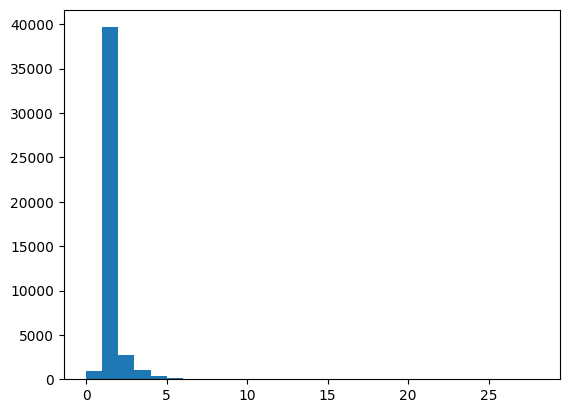

In [42]:
import matplotlib.pyplot as plt

diagnoses_lengths = df['diagnoses'].apply(lambda x: len(x) if isinstance(x, list) else 0)
plt.hist(
    diagnoses_lengths,
    bins=range(0, max(diagnoses_lengths)+1),
)

In [12]:
pd.concat([
    (df["disease_type"].value_counts(normalize=True)*100).round(2),
    df["disease_type"].value_counts(normalize=False)
], axis=1)

,proportion,count
disease_type,,
Adenomas and Adenocarcinomas,32.28,14549
Ductal and Lobular Neoplasms,8.08,3642
Myeloid Leukemias,7.69,3465
"Epithelial Neoplasms, NOS",7.29,3287
Squamous Cell Neoplasms,6.90,3112
Gliomas,5.14,2317
Lymphoid Leukemias,4.89,2204
"Cystic, Mucinous and Serous Neoplasms",3.98,1792
Nevi and Melanomas,2.60,1174
